# Introduction

For this project, the data used contains daily weather observations from numerous Australian weather stations. For the purpose of the project, the only city used will be Darwin, given that it is the Australian city with the most rain per year.

The main purpose of the project is to analyze every variable and determine if any of them have a significant correlation with the ammount of rainfall. To achieve this, all of the models seen in the Machine Learning Models class will be used:

    - Linear Regression
    - Polynomial Regression
    - R squared
    - Adjusted R squared
    - ANOVA Test
    - Penalty functions
        > Linear Regression with Lasso
        > Ridge Regression
        > Lasso Polynomial Regression
    - Splines (Will only be described and an explanation on how they could be implemented in the project will be presented)

The main purpose of this project is to determine if there's any relation between the given variables and the ammount of rain on that day.

# Data

This DataSet can be obtained from Kaggle: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

__-Rainfall (Response):__ Ammount of rain recorded for the day in mm.

__-Date:__ The Date of observation.

__-Loaction:__ Location of the weather station.

__-MinTemp:__ Minimum Temperature in Celsius.

__-MaxTemp:__ Maximum Temperature in Celsius.

__-Evaporation:__ Class A pan evaporation in mm in the 24 hours to 9 am.

__-Sunshine:__ Number of hours of sunshine in the day.

__-WindGustDir:__ Direction of the strongest wind gust in the 24 hours to midnight.

__-WindGustSpeed:__ The speed of the strongest wind  gust in the 24 hours to midnight.

__-WindDir9am:__ Direction of the wind at 9 am.

__-WindDir3pm:__ Direction of the wind at 3 pm.

__-WindSpeed9am:__ The speed of the Wind at 9 am.

__-WindSpeed3pm:__ The speed of the Wind at 3 pm.

__-Humidity9am:__ Percentage of humidity at 9 am.

__-Humidity3pm:__ Percentage of humidity at 3 pm.

__-Pressure9am:__ Atmospheric pressure reduced to mean sea level at 9 am.

__-Pressure3pm:__ Atmospheric pressure reduced to mean sea level at 3 pm.

__-Cloud9am:__ Fraction of sky obscured by cloud at 9 am. Measured in oktas, which are a unit of eights. Records how many eights of the sky are obscured by clouds.

__-Cloud9am:__ Fraction of sky obscured by cloud at 3 pm. Measured in oktas.

__-Temp9am:__ Temperature in Celsius at 9am.

__-Temp3pm:__ Temperature in Celsius at 3pm.

After analyzing the data, it has been determined that the two variables that have the stronger relation to Rainfall, our response variable, are: __Humidity9am__ and __Humidity3pm__. Therefore, from now on, the project will be about those two variables in specific.

# Hypothesis

After taking a quick look at the data, and based on what I've experienced myself, I'd predict that the variable that will have the strongest correlation to the response variable will be either Temperature 9 am or Temperature 3 pm.

I'd think that the temperature would lower on rainy days.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from collections import Counter

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from math import sqrt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.anova import anova_lm
import sklearn.metrics

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Code to Hide to Code

# Set the NoteBook's Style

In [28]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set(rc={"figure.figsize":(10.5,10.5)})

# Importing the Data

In [35]:
import pandas as pd
weather = pd.read_csv('CleanData.csv')
darwinnorf = weather.drop(columns="Rainfall") ##darwinnorf is the same dataset as before, but without rainfaill. This is to be used in methods that do not need the response variable, such as the multiple linear regression.
weather.shape

(3062, 18)

In [36]:
weather.head(2)

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,135921,20.0,33.1,0.0,4.4,11.0,41.0,13.0,17.0,81.0,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,0.0
1,135922,19.4,32.4,0.0,6.0,10.4,50.0,15.0,28.0,81.0,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,0.0


Since we will only focus on Darwin for this project, we drop all of the other cities' rows. We will also drop the Date since it will not be relevant given the methods being used in the project.
Lastly, we will drop all the rows that contain NA values since there are not many of them (under 100) and turning them into 0 would affect the outcomes given that we're working with numeric values.

# Data Split

In [37]:
y = pd.DataFrame(data=weather, columns=['Rainfall']) ## Our Response Variable
y.describe()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(darwinnorf, y, test_size=0.20, random_state=42) ## Data Split 20/80

# Methods

# 1. Simple Linear Regression

It's a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables)

    > Predict quantitative response variable by minimizing sum of squared errors
    > Linear form
    > Parametric
    
Formula:    
\begin{equation}
y = a + bx
\end{equation}
    
y = variable we're predicting | 
a = intercept | 
b = coefficient | 
x = feature

For the project, Simple Linar Regression are used to determine the correlation between the response variable **Rainfall** and the main focus explanatory variables

In [38]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train,X_train[['Cloud9am']])

simple_result1 = simple_model.fit()

print(simple_result1.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     640.9
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          8.43e-126
Time:                        23:39:40   Log-Likelihood:                -9345.0
No. Observations:                2449   AIC:                         1.869e+04
Df Residuals:                    2448   BIC:                         1.870e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cloud9am       1.1318      0.045     25.317      0.0

In [40]:
X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train,X_train[['Cloud3pm']])

simple_result2 = simple_model.fit()

print(simple_result2.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     610.9
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          1.34e-120
Time:                        23:39:48   Log-Likelihood:                -9356.9
No. Observations:                2449   AIC:                         1.872e+04
Df Residuals:                    2448   BIC:                         1.872e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cloud3pm       1.1126      0.045     24.717      0.0

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


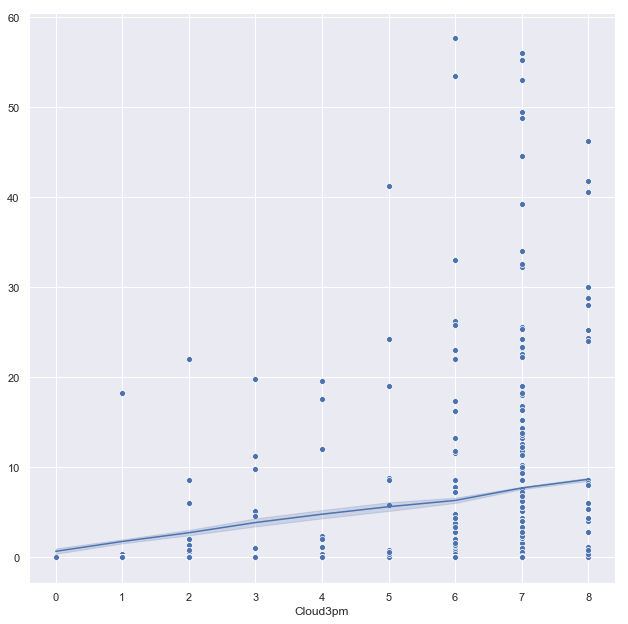

In [41]:
sns.scatterplot(x = X_test['Cloud3pm'], y = y_test.values.ravel())
sns.lineplot(x = X_test['Cloud3pm'] , y = y_pred_simple)

# 2. Multiple Linear Regression

It attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to observed data.

Every value of the independent variable X is associated with a value of the dependent variable Y.

Formula: 

\begin{equation}
\mu_y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + \epsilon
\end{equation}

This formula describes how the mean response changes with the explanatory variables.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(darwinnorf, y, test_size=0.20, random_state=42) ##Darwinnorf as we don't want to include our target value in the regression as an independant variable.

multiple_model = sm.OLS(y_train ,X_train)

multiple_result = multiple_model.fit()

print(multiple_result.summary())

                            OLS Regression Results                            
Dep. Variable:               Rainfall   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     137.7
Date:                Tue, 12 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:39:52   Log-Likelihood:                -8803.9
No. Observations:                2449   AIC:                         1.764e+04
Df Residuals:                    2432   BIC:                         1.774e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Unnamed: 0        0.0008      0.000      4.057

# 3. Polynomial Regression

It's a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.
It has some advantages, for example:

    > It can better fit data by capturing nonlinear relationships. 
    > Still relatively interpretable.
    
However, it also has some disadvantages:

    > Can easily lead to overfitting.
    > It's less interpretable than linear regression.
    > It can specially lead to poor extrapolation predictions.
    
Formula:

\begin{equation}
\mu_y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + ... + \beta_p x^p + \epsilon
\end{equation}

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


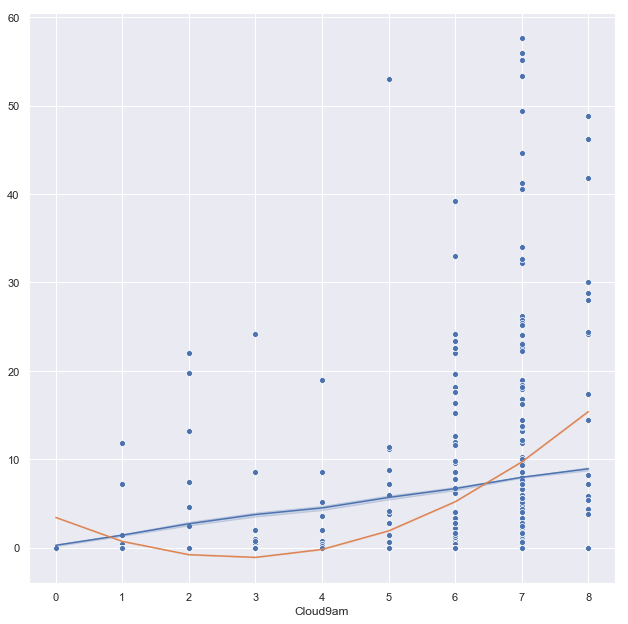

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train,X_train[['Cloud9am','Cloud3pm']])

simple_result = simple_model.fit()

X_test = sm.add_constant(X_test)
y_pred_simple = simple_result.predict(X_test[['Cloud9am','Cloud3pm']])

poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(pd.DataFrame(X_train['Cloud9am']))
X_poly_test = poly_reg.fit_transform(pd.DataFrame(X_test['Cloud9am']))
poly_result = poly_reg.fit(X_poly_train, y_train)

poly_model = LinearRegression()
poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

sns.scatterplot(x = X_test['Cloud9am'], y = y_test.values.ravel())
sns.lineplot(x = X_test['Cloud9am'] , y = y_pred_simple)
sns.lineplot(x = X_test['Cloud9am'] , y = y_poly_pred.ravel())

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


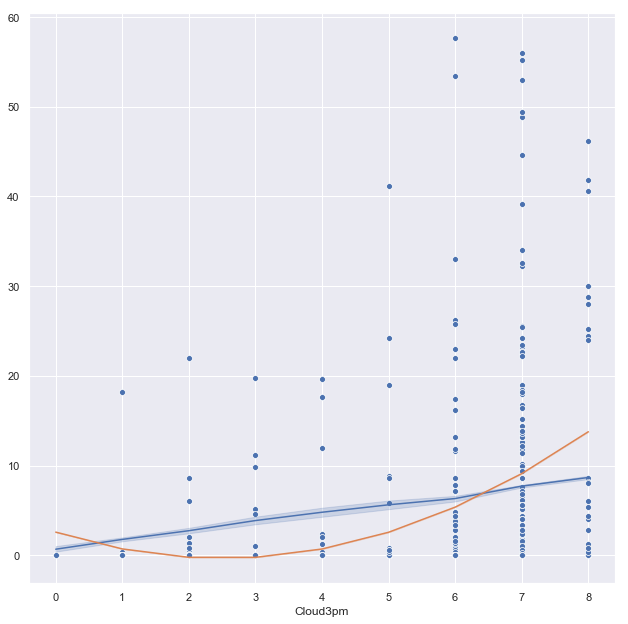

In [44]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(pd.DataFrame(X_train['Cloud3pm']))
X_poly_test = poly_reg.fit_transform(pd.DataFrame(X_test['Cloud3pm']))
poly_result = poly_reg.fit(X_poly_train, y_train)

poly_model = LinearRegression()
poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

sns.scatterplot(x = X_test['Cloud3pm'], y = y_test.values.ravel())
sns.lineplot(x = X_test['Cloud3pm'] , y = y_pred_simple)
sns.lineplot(x = X_test['Cloud3pm'] , y = y_poly_pred.ravel())

# 4. ANOVA

ANOVA will recieve two models and will compare them both, returning some parameters. The ones we're interesed in are: 
    
    > F score
    > Probability Score

F Score represents how alike the models are.
The Probability Score will tell us how probable it is that one model will predict what the other predicted out of pure chance or luck

We want F score to be large, and Probability Score to be low.

In [45]:
from statsmodels.stats.anova import anova_lm

poly_model = sm.OLS(y_train,X_poly_train)
poly_result = poly_model.fit()

X_train = sm.add_constant(X_train)
simple_model = sm.OLS(y_train,X_train[['Cloud9am']])
simple_result = simple_model.fit()

anovaResults = anova_lm(simple_result1, poly_result)
print(anovaResults)

   df_resid            ssr  df_diff       ss_diff          F        Pr(>F)
0    2448.0  295739.248235      0.0           NaN        NaN           NaN
1    2446.0  284289.602273      2.0  11449.645961  49.255818  1.066620e-21


C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# 5. Regression-based penalty functions

They consist of a penalty parameter multiplied by a measure of violation of the constraints. The measure of violation is nonzero when the constraints are violated and is zero in the region where constraints are not violated.

When we want to reduce the variance of our model by adding bias we can add a penalty function in addition to our least squares minimization.

    > The Lasso and ridge regression are similar, but the Lasso is more likely to introduce 
      sparsity.
    > For this reason, when most variables are predictive, we slightly prefer ridge regression.

In [46]:
y = pd.DataFrame(weather['Rainfall'])
x = darwinnorf[['WindGustSpeed', 'Pressure9am', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Temp3pm']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=50)

X_train.reset_index(inplace=True)
X_test.reset_index(inplace=True)
y_train.reset_index(inplace=True)
y_test.reset_index(inplace=True)

from sklearn.preprocessing import LabelBinarizer
WindGustSpeed_lb = LabelBinarizer()

# Train
WindGustSpeed_dummies_df = WindGustSpeed_lb.fit_transform(X_train['WindGustSpeed'].values)

# Test
WindGustSpeed_dummies_test_df = WindGustSpeed_lb.fit_transform(X_test['WindGustSpeed'].values)

WindGustSpeed_dummies_df = pd.DataFrame(WindGustSpeed_dummies_df, columns = ["WindGustSpeed"+str(int(i)) for i in range(WindGustSpeed_dummies_df.shape[1])])
X_train_final = pd.concat([X_train, WindGustSpeed_dummies_df], axis=1)

#Test
WindGustSpeed_dummies_test_df = pd.DataFrame(WindGustSpeed_dummies_test_df, columns = ["WindGustSpeed"+str(int(i)) for i in range(WindGustSpeed_dummies_test_df.shape[1])])
X_test_final = pd.concat([X_test, WindGustSpeed_dummies_test_df], axis=1)

#Train
X_train_final.drop('index', axis=1, inplace=True)
X_train_final.drop('WindGustSpeed', axis=1, inplace=True)
y_train.drop('index', axis=1, inplace=True)

# Test
X_test_final.drop('index', axis=1, inplace=True)
X_test_final.drop('WindGustSpeed', axis=1, inplace=True)
y_test.drop('index', axis=1, inplace=True)

C:\Anaconda\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# 5.1 Lasso

It's a method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.

Lasso regression performs L1 regularization that is it adds the penalty equivalent to the absolute value of the magnitude of the coefficients.

Formula:

\begin{equation}
\displaystyle\sum_{i=1}^{n} (y_i - z_i \beta)^2 + \lambda \displaystyle\sum_{j=1}^{p} |\beta_j|
\end{equation}

In [47]:
lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train)
lr_pred = lr_model.predict(X_test_final)
print(lr_model.score(X_test_final, y_test))
lr_model.coef_

0.3240112659265857


array([[-8.19317521e-01,  3.75264488e-03,  1.50966552e-02,
         1.84976031e-01, -6.19274210e-02,  2.27546211e-01,
        -1.09928163e+00, -3.05460097e+00, -6.85198678e+00,
        -8.45756269e+00, -8.37320706e+00, -5.38015638e+00,
        -8.06759327e+00, -6.01835096e+00, -6.41111642e+00,
        -6.16259574e+00, -6.84327163e+00, -6.48540544e+00,
        -5.53777684e+00, -5.11486500e+00, -5.92923161e+00,
        -6.13209013e+00, -4.50740337e+00, -4.08087812e+00,
        -3.31181458e+00, -6.17663260e+00, -2.55268829e-01,
        -4.01036991e+00, -7.40728725e+00, -6.30638143e+00,
         1.27230086e+01,  7.27793240e+00,  1.13788183e+00,
        -2.51053654e+00, -5.69655976e+00,  1.02377224e+00,
         8.87331138e+00,  2.72373017e+00, -1.50635446e+01,
         1.62401034e+01,  2.81009717e+00,  4.50901432e+01,
         8.81719343e+00, -1.10288354e+00,  4.85321976e+01]])

In [48]:
# Lasso regression model with alpha = 10000 (high penalty)
lasso_model_10k = Lasso(alpha=10000, fit_intercept=True)
lasso_model_10k.fit(X_train_final, y_train)
lasso_10k_pred = lasso_model_10k.predict(X_test_final)
print(lasso_model_10k.score(X_test_final, y_test))
lasso_model_10k.coef_

-0.00012764175028356917


array([-0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0., -0.,  0., -0.,
       -0., -0., -0., -0., -0., -0.,  0., -0., -0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


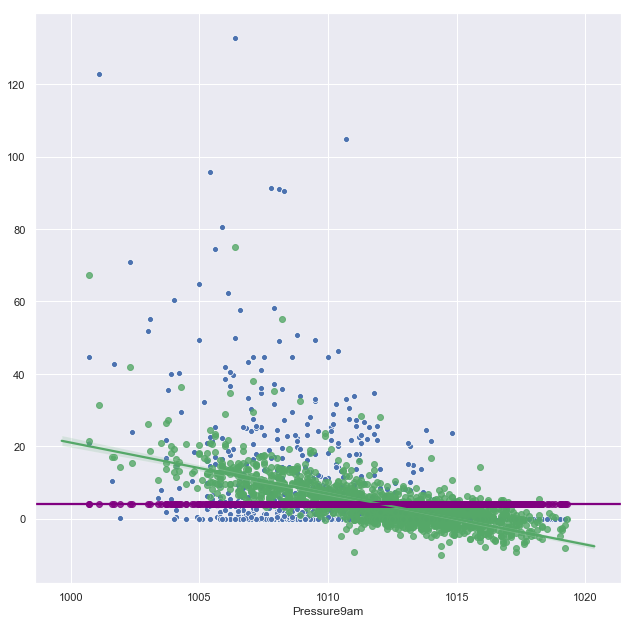

In [49]:
sns.scatterplot(x = X_test_final['Pressure9am'], y = y_test.values.ravel())
sns.regplot(x = X_test_final['Pressure9am'], y = lr_pred.ravel(), color='g')
sns.regplot(x = X_test_final['Pressure9am'], y = lasso_10k_pred.ravel(), color='purple')

# 5.1.1 Lasso polynomial regression

In [50]:
poly_reg = PolynomialFeatures(degree = 3)
X_poly_train = poly_reg.fit_transform(pd.DataFrame(X_train_final))
X_poly_test = poly_reg.fit_transform(pd.DataFrame(X_test_final))
poly_result = poly_reg.fit(X_train_final, y_train)

poly_model = LinearRegression()
poly_result = poly_model.fit(X_poly_train, y_train)
y_poly_pred = poly_model.predict(X_poly_test)

In [51]:
lasso_poly_model_10k = Lasso(alpha=10000, fit_intercept=True)
lasso_poly_model_10k.fit(X_poly_train, y_train)
lasso_poly_10k_pred = lasso_poly_model_10k.predict(X_poly_test)
print(lasso_poly_model_10k.score(X_poly_test, y_test))
lasso_poly_model_10k.coef_

0.44161275407472256


C:\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([ 0., -0., -0., ...,  0.,  0.,  0.])

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


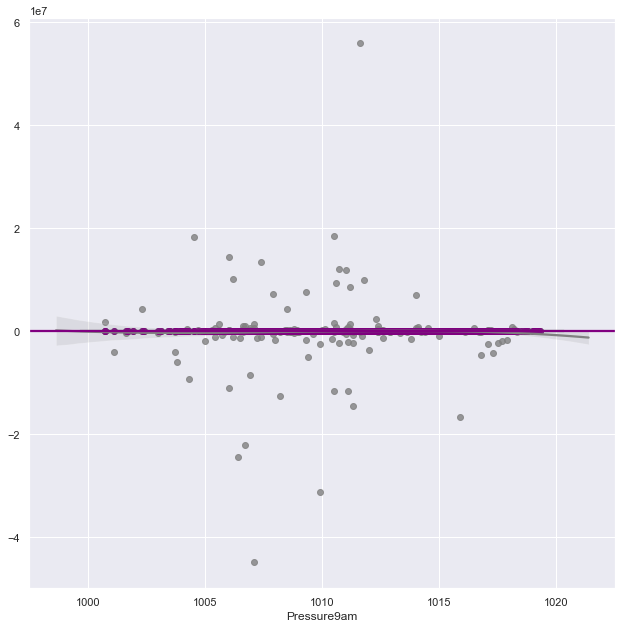

In [52]:
sns.scatterplot(x = X_test_final['Pressure9am'], y = y_test.values.ravel())
sns.regplot(x = X_test_final['Pressure9am'], y = lr_pred.ravel(), color='g')
sns.regplot(x = X_test_final['Pressure9am'], y = y_poly_pred.ravel(), color='gray', order=3)
sns.regplot(x = X_test_final['Pressure9am'], y = lasso_poly_10k_pred.ravel(), color='purple', order=3)

# 5.2 Ridge Regression

Ridge Regression is a remedial measure taken to alleviate multicollinearity amongst regression predictor variables in a model.

It's an extension for linear regression. It's basically a regularized linear regression model.

The L2 norm term in ridge regression is weighted by the regularization parameter alpha. So, if the alpha value is 0, it means that it is just an Ordinary Least Squares Regression model. So, the larger is the alpha, the higher is the smoothness constraint

Foruma:

\begin{equation}
\displaystyle\sum_{i=1}^{n} (y_i - z_i^T \beta)^2 + \lambda \displaystyle\sum_{j=1}^{p} \beta_j^2
\end{equation}

In [53]:
ridge_model = Ridge(alpha=10000, fit_intercept=True)
ridge_model.fit(X_train_final, y_train)
ridge_pred = ridge_model.predict(X_test_final)
print(ridge_model.score(X_test_final, y_test))
ridge_model.coef_

0.2501235483099463


array([[-3.27887563e-01,  1.51304565e-01, -1.13270180e-02,
         1.77650695e-01,  6.46445585e-02,  1.97902962e-01,
        -3.04034658e-01,  5.12671213e-04, -1.11555447e-03,
        -2.13181802e-03, -4.51548839e-03,  1.69895752e-03,
        -1.70524538e-02, -4.59322117e-03, -1.64618569e-02,
        -1.17299041e-02, -2.23917401e-02, -1.56543396e-02,
        -1.77218207e-04,  2.88125962e-03, -2.97579905e-03,
        -2.60365009e-03,  1.09495555e-02,  7.31257609e-03,
         1.34016650e-02, -2.21397353e-03,  1.85180428e-02,
         2.75414342e-03, -2.57813043e-03, -2.32781181e-04,
         7.25882026e-03,  4.18096545e-03,  4.63300817e-03,
         1.57999908e-03, -6.08990988e-05,  3.58143412e-03,
         1.37266163e-03,  1.75383623e-03, -9.43983575e-04,
         6.89565254e-03,  8.18973532e-04,  1.03048270e-02,
         1.36759878e-03,  4.29163180e-04,  5.22700069e-03]])

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


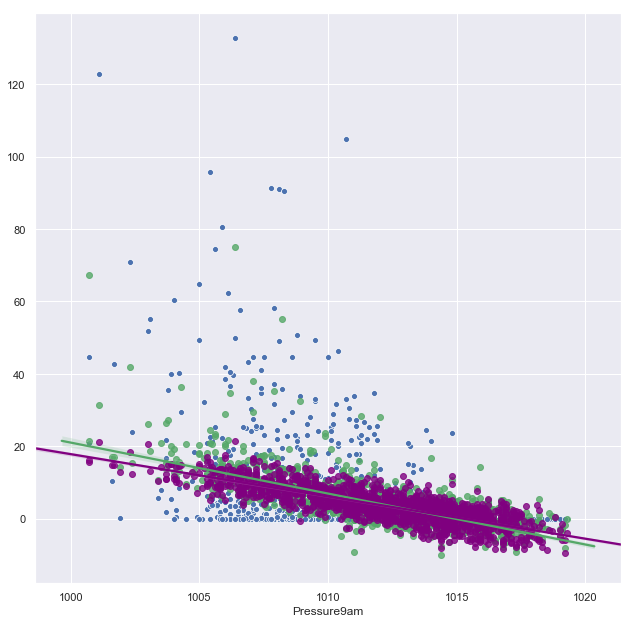

In [54]:
sns.scatterplot(x = X_test_final['Pressure9am'], y = y_test.values.ravel())
sns.regplot(x = X_test_final['Pressure9am'], y = lr_pred.ravel(), color='g')
sns.regplot(x = X_test_final['Pressure9am'], y = ridge_pred.ravel(), color='purple')

# 6. Splines

A linear spline is a continuous function formed by connecting linear segments. The points where the segments connect are called the knots of the spline.

A spline of degree D is a function formed by connecting polynomial segments of degree D so that:
    
    > The function is continuos.
    > The function has D-1 continuos derivatives.
    > The D^th derivative is constant between knots.


The truncated polynomial of degree D associated with a knot Epsilon_k is the function which is equal to 0 to the left of Epsilon_k and equal to (X - Epsilon_k)^D to the right of Epsilon_k.

The equation for a spline of degree D with K knots is: 

\begin{equation}
Y = \beta_0 \displaystyle\sum_{d=1}^{D} \beta_d x^d + \displaystyle\sum_{k=1}^{K} b_k (X - \epsilon_k)^D
\end{equation}

# Results

### Linear Regressions

With the linear regressions, the results proved that there was no strong relation between the independant variables and the response variable. Even with the variables that showed a stronger link, the Linear Regression showed that there was not much correlation between them.

### Multiple Linear Regression

Since the multiple linear regression performed included all of the variables, the relation achieved in relation to the response variable was quite low too.
As for individual variables, it shows a ver weak link between them and the response variable too.

### Polynomial Function

The polynomial functions returned an even lower correlation value between the independant variables and the response variable.
The curve shows a normal fluctuation of the data. No underfitting or overfitting showed for the variables.

### ANOVA

When performing an anova test to compare the two models, it returned a relatively low F-value, and a very low probability value.

As for our F-value, this means that the models do look quite alike, although not entirely.

As for our probability value, given that it's low, it means that they do not predict out of chance or luck, but they actually do a good job when predicting.

### Penalty Functions

This functions were the ones that performed the best, improving our returned values to up to 0.4372. This of course is not the best number, but it's much better than those that we were getting with the Regular Regressions. This could be due to a high variance in the Data.

### Splines

This method was not applied to the project, nevertheless, it could be applied to correctly smoothen the curves returned from the data. Since the data returns irregular points, Splines would help to make the data more predictable.

# Conclusion

The independant variables don't seem to be strongly correlated to the response variable. This could be due to there being so many days with no rain recorded. 

For example, if we took only one week and recorded all of the variables in the dataset, the only variable that could stay the same through many days, or even the whole week, is precisely rainfall.

Where I'm trying to get is: you can't accurately predict rain with the variables given since they're not the responsibles of it.
Of course there's variables that would have some correlation, for instance, you will never see rain if there's no clouds, therefore, clouds will have some relation with rain, but this doesn't mean that clouds = rain at all.

There's other variables that will show correlation, like humidity. This sounds logical, but if you think about it, it's actually humidity who depends on rain. Of course, if there's a lot of rain, humidity levels will raise.
The only scenario where this would be helpfull would be to predict if we're looking at a rainy season or not.

So, to wrap it all up, basically a low correlation level was expected due to the reasons explained before. However this does bring up interesting suggestions, such as, what about doing the same proccess but focusing only on days that recorded rain?

Of course this would change the objective, we would not be trying to predict rain, but rather we'd attempt to predict the ammount of rain in a day.

This results mean that the Hypothesis was completely incorrect, as the Temperature were not the stronger linked independant variables.

# Appendix

1. An introduction to splines. Trinity River Restoration Prokram. Workshop on Outmigration: Population Estimation. October - 6-8, 2009. 
http://people.stat.sfu.ca/~cschwarz/Consulting/Trinity/Phase2/TrinityWorkshop/Workshop-handouts/TW-04-Intro-splines.pdf

2. Towards Data Science: Polynomial Regression. 2018: https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

3. Yale, Multiple Linear Regression. 1997: http://www.stat.yale.edu/Courses/1997-98/101/linmult.htm

4. Towards Data Science: What is a Spline? 2018: https://towardsdatascience.com/data-science-deciphered-what-is-a-spline-18632bf96646

5. Towards Data Science: Ridge and Lasso Regression. 2018 https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b